# House Prices - Linear Regression

In [15]:
#Import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import PredictionErrorDisplay

In [3]:
df = pd.read_csv('../../datasets/house_prices/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## Data Processing

<Axes: >

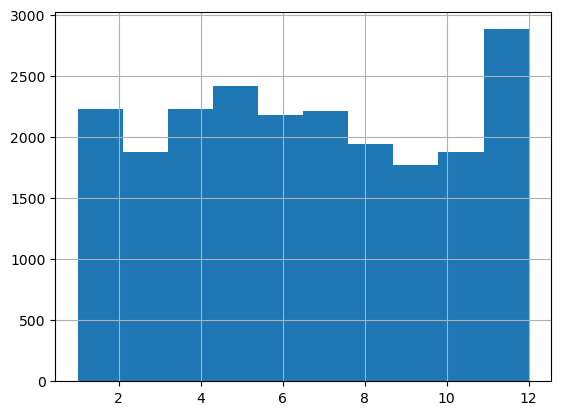

In [5]:
df['month'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S').dt.month
df['month'].hist()

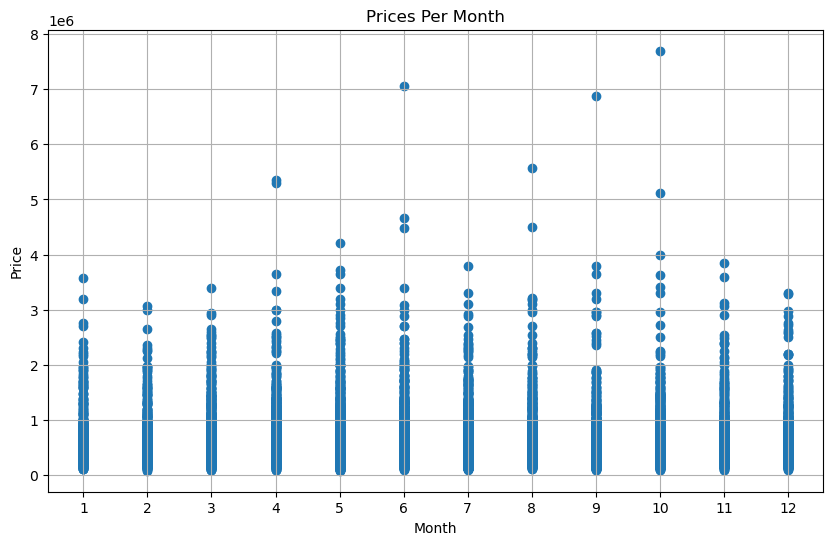

In [6]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['month'], df['price'])
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Prices Per Month')
plt.xticks(range(1, 13))  # Ensure all months are shown on x-axis
plt.grid(True)
plt.show()

In [7]:
df = df.drop(columns='date')
df = df.drop(columns='id')

In [8]:
y = df['price']
df = df.drop(columns='price')

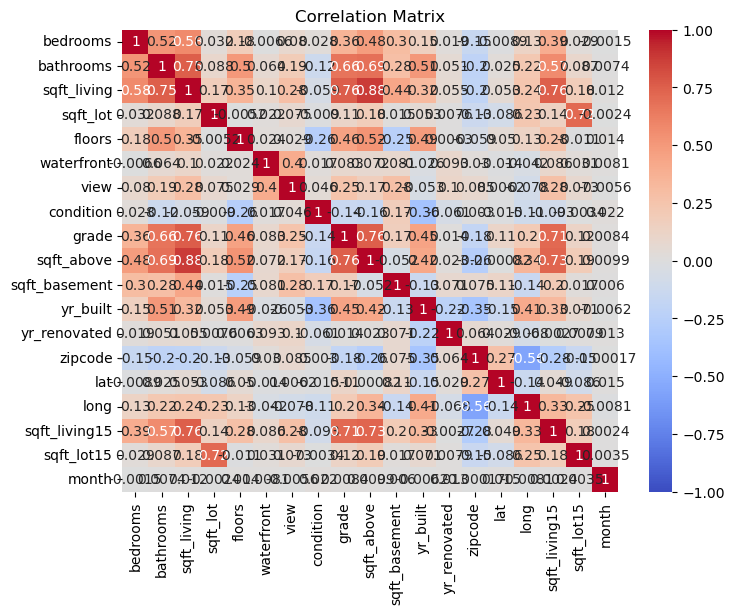

In [9]:
corr_matrix = df.corr()
# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## Train Polynomial Linear Regression with Ridge Regularization

training score:  0.8340134102545059
test score:  0.7955286638148833
Number of features:  210


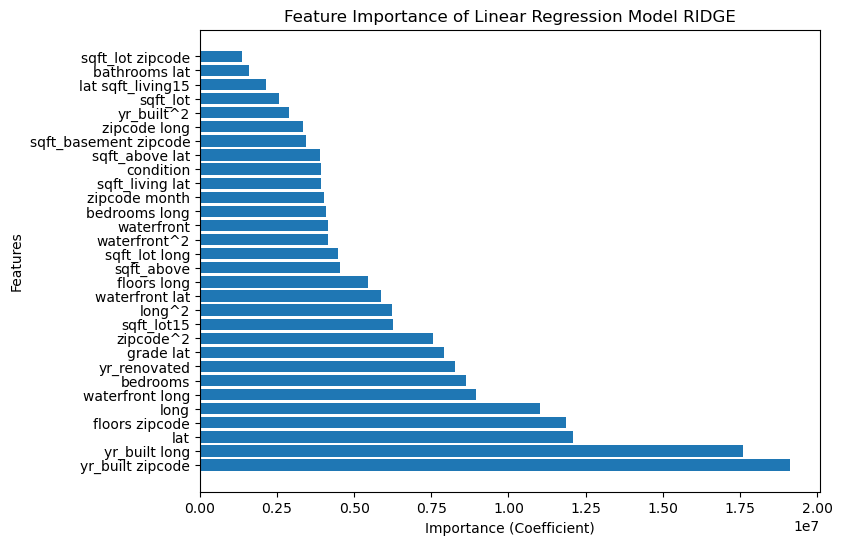

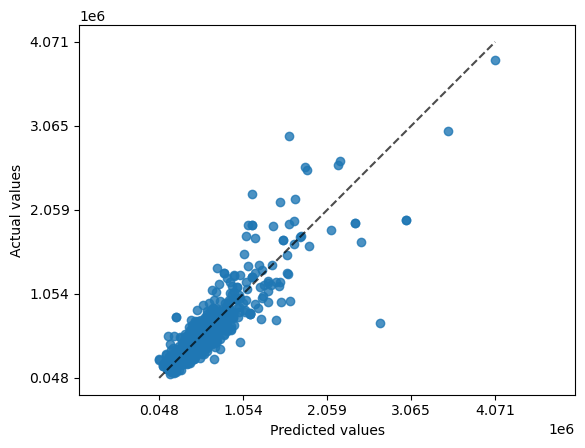

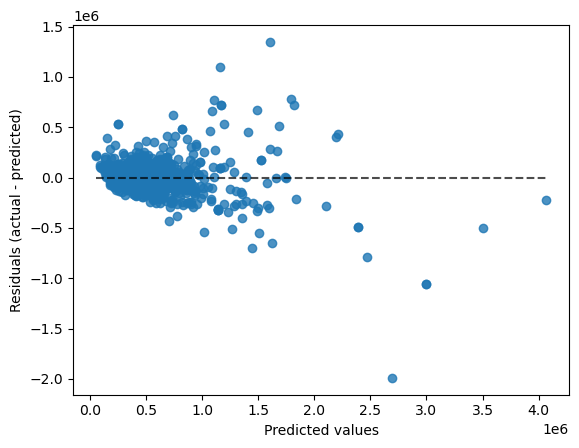

In [18]:
poly = PolynomialFeatures(2)
df_poly = poly.fit_transform(df)

X_train, X_test, y_train, y_test = train_test_split(df_poly, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
Xtrain = scaler.fit_transform(X_train)
Xtest = scaler.transform(X_test)

reg = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 10, 100]).fit(Xtrain, y_train)
training_score = reg.score(Xtrain, y_train)
test_score = reg.score(Xtest, y_test)

print("training score: ", training_score)
print("test score: ", test_score)

# Extract the feature importance (coefficients)
feature_importance = reg.coef_
feature_name = poly.get_feature_names_out()

features = {
    'name': feature_name,
    'importance': feature_importance
}
feature_importance_df = pd.DataFrame(features)

feature_importance_df_sorted = feature_importance_df.sort_values(by='importance', ascending=False)
print("Number of features: ", feature_importance_df.shape[0])
feature_importance_df_sorted = feature_importance_df_sorted.head(30)

# Plotting
plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df_sorted['name'], feature_importance_df_sorted['importance'], align='center')
plt.ylabel('Features')
plt.xlabel('Importance (Coefficient)')
plt.title('Feature Importance of Linear Regression Model RIDGE')
plt.show()

#Plot residual errors
display = PredictionErrorDisplay.from_estimator(estimator=reg, kind="actual_vs_predicted", X=Xtest, y=y_test)
display.plot()

training score:  0.7846795797584346
test score:  0.7540310714821039


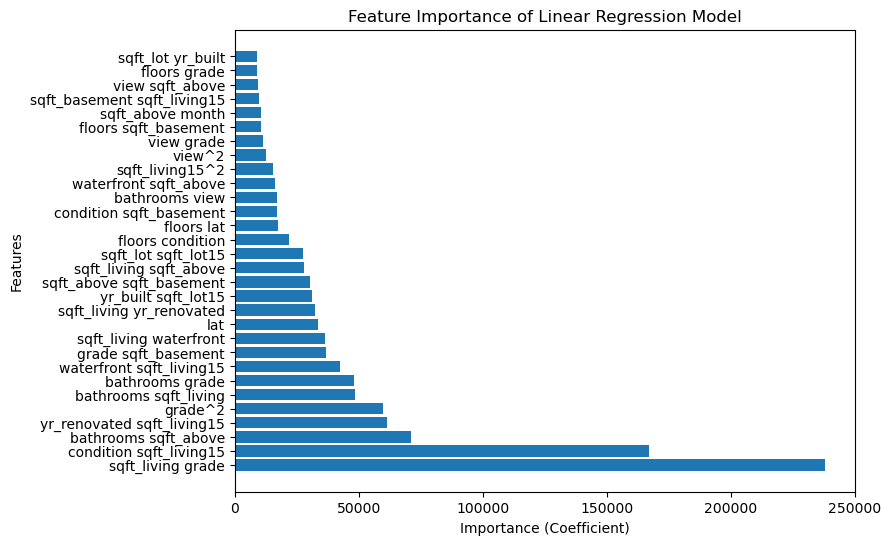

In [10]:
poly = PolynomialFeatures(2)
df_poly = poly.fit_transform(df)

X_train, X_test, y_train, y_test = train_test_split(df_poly, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
Xtrain = scaler.fit_transform(X_train)
Xtest = scaler.transform(X_test)

reg = LassoCV(cv=5, random_state=42, max_iter=100000, eps=1e-3).fit(Xtrain, y_train)
training_score = reg.score(Xtrain, y_train)
test_score = reg.score(Xtest, y_test)

print("training score: ", training_score)
print("test score: ", test_score)

# Extract the feature importance (coefficients)
feature_importance = reg.coef_
feature_name = poly.get_feature_names_out()

features = {
    'name': feature_name,
    'importance': feature_importance
}
feature_importance_df = pd.DataFrame(features)

feature_importance_df_sorted = feature_importance_df.sort_values(by='importance', ascending=False)

feature_importance_df_sorted = feature_importance_df_sorted.head(30)

# Plotting
plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df_sorted['name'], feature_importance_df_sorted['importance'], align='center')
plt.ylabel('Features')
plt.xlabel('Importance (Coefficient)')
plt.title('Feature Importance of Linear Regression Model LASSO')
plt.show()

# Create another model without the Polynomial Features

training score:  0.6997883852415765
test score:  0.7018108481860756


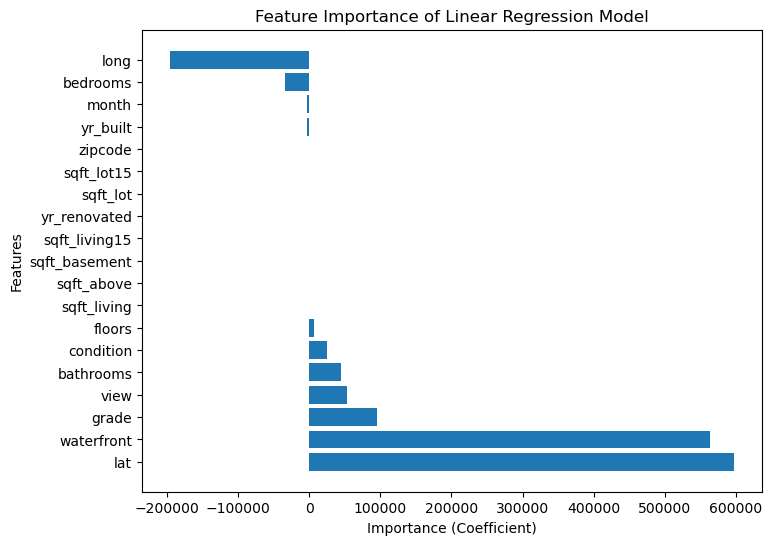

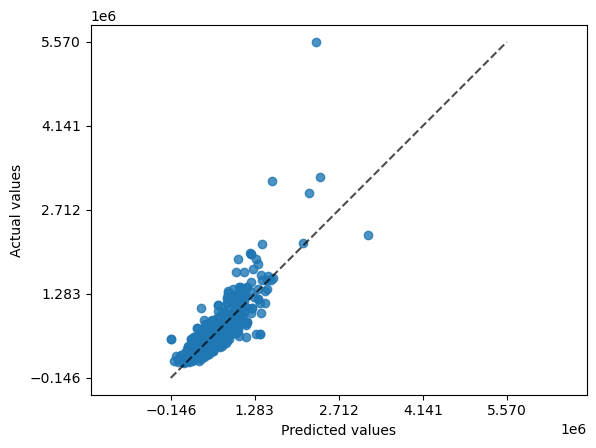

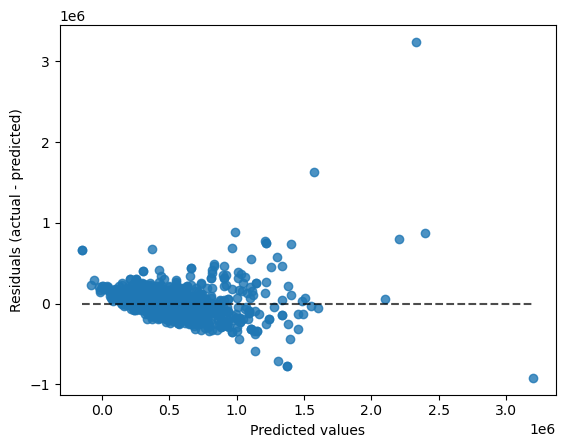

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)
reg = LinearRegression().fit(X_train, y_train)
training_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)

print("training score: ", training_score)
print("test score: ", test_score)

# Extract the feature importance (coefficients)
feature_importance = reg.coef_
feature_name = df.columns.tolist()

features = {
    'name': feature_name,
    'importance': feature_importance
}
feature_importance_df = pd.DataFrame(features)

feature_importance_df_sorted = feature_importance_df.sort_values(by='importance', ascending=False)

feature_importance_df_sorted = feature_importance_df_sorted.head(30)

# Plotting
plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df_sorted['name'], feature_importance_df_sorted['importance'], align='center')
plt.ylabel('Features')
plt.xlabel('Importance (Coefficient)')
plt.title('Feature Importance of Linear Regression Model')
plt.show()

#Plot residual errors
display = PredictionErrorDisplay.from_estimator(estimator=reg, kind="actual_vs_predicted", X=X_test, y=y_test)
display.plot()

# Try a regression with a neural network

In [22]:
from sklearn.neural_network import MLPRegressor

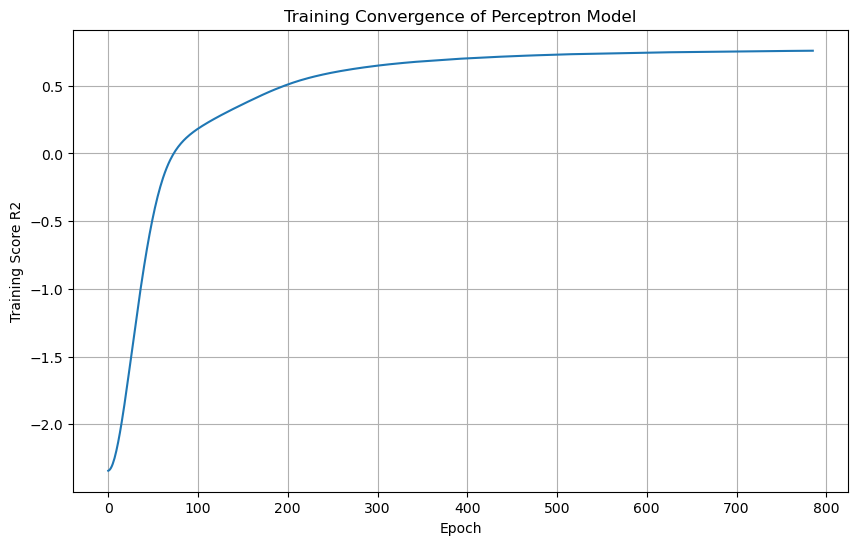

training score:  0.7908127334356472
test score:  0.7702158661335634


In [32]:
poly = PolynomialFeatures(2)
df_poly = poly.fit_transform(df)

X_train, X_test, y_train, y_test = train_test_split(df_poly, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

reg = MLPRegressor(random_state=1, max_iter=3000, early_stopping=True, hidden_layer_sizes=300).fit(X_train, y_train)

# Plotting the scores over epochs
plt.figure(figsize=(10, 6))
plt.plot(reg.validation_scores_)
plt.xlabel('Epoch')
plt.ylabel('Training Score R2')
plt.title('Training Convergence of Perceptron Model')
plt.grid(True)
plt.show()

training_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)

print("training score: ", training_score)
print("test score: ", test_score)